## Import necessary libraries

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Define the model of the inverted pendulum

In [2]:
def inverted_pendulum(x, t):
    g = 9.8
    l = 1.0
    m = 1.0
    M = 1.0
    
    d1 = M + m * (1 - np.cos(x[1])**2)
    d2 = l * d1
    
    F = 0  # No input
    
    xp = np.zeros(4)
    xp[0] = x[2]
    xp[1] = x[3]
    xp[2] = (F + m * l * x[3]**2 * np.sin(x[1]) - m * g * np.sin(x[1]) * np.cos(x[1])) / d1
    xp[3] = (-F * np.cos(x[1]) - m * l * x[3]**2 * np.sin(x[1]) * np.cos(x[1]) + (M + m) * g * np.sin(x[1])) / d2
    
    return xp

## Initial conditions: [x, theta, v, omega]

In [3]:
x0 = [0, 0.1, 0, 0]  # Initial state

## Time vector for the simulation

In [4]:
tspan = np.linspace(0, 1, 100)  # From 0 to 1 second, 100 points

## Solve the system of ODEs

In [5]:
x = odeint(inverted_pendulum, x0, tspan)

## Plot state variables

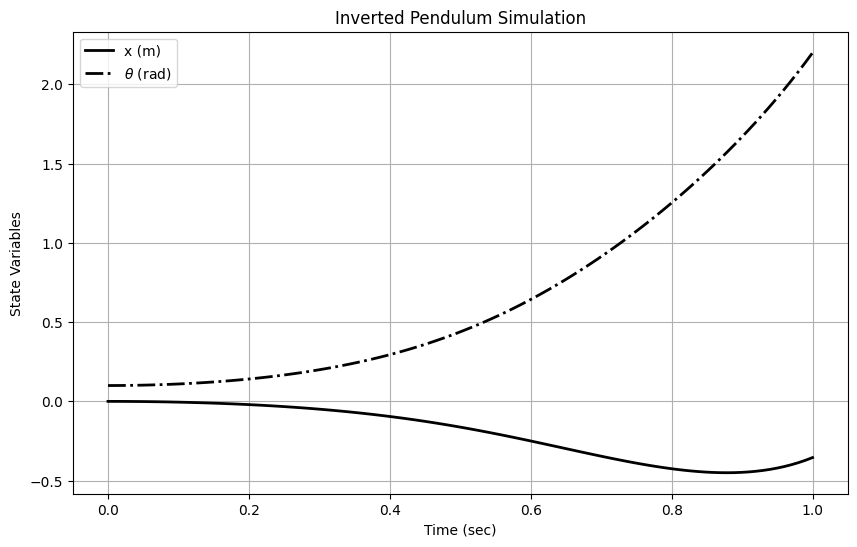

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tspan, x[:, 0], 'k', linewidth=2, label='x (m)')
plt.plot(tspan, x[:, 1], '-.k', linewidth=2, label=r'$\theta$ (rad)')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.title('Inverted Pendulum Simulation')
plt.show()